In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as p
import numpy as np
import flamingo_analysis as fa 
import flamingo_tangos as ft
import tangos as db

db.init_db('data-hubble-flow.db')

Sanity check
------------

The following is a basic sanity check that looks at the mass profiles at $z=1$ and $z=0$ of a halo
population that are roughly matched by their evolution (according to Fig 2 of Lucie-Smith et al),
with $\langle M \rangle ~10^{13.2}$ and $10^{13.7}$ respectively at the two epochs.

We want to sanity check that the flows at $z=0.5$ give the right order of magnitude changes in the
mass profiles.

In the first instance we look at gas+dm mass (not stars just because I didn't calculate their
profiles, so there is a very slight overall mass deficit due to this).

In [2]:
ts_start = db.get_timestep("%FIDUCIAL%/%01%")
ts_mid = db.get_timestep("%FIDUCIAL%/%03%")
ts_end = db.get_timestep("%FIDUCIAL%/%08%")

def make_sanity_check_plot(particle='total', m1=13.2, m2=13.7):
    p.figure(figsize=(12, 6))
    p.subplot(121)

    match particle:
        case 'total':
            mass_calc = 'dm_mass_enclosed + gas_mass_enclosed'
            flow_calc = 'dm_mdot + gas_mdot'
        case 'gas':
            mass_calc = 'gas_mass_enclosed'
            flow_calc = 'gas_mdot'
        case 'dm':
            mass_calc = 'dm_mass_enclosed'
            flow_calc = 'dm_mdot'
        case _:
            raise ValueError(f"Unknown particle type: {particle}")

    mass_start, M200m, r200m = ts_start.calculate_all(mass_calc, 'M200m()', 'r200m')
    start_mask = (M200m>10**(m1-0.2))*(M200m<10**(m1+0.2))
    mass_start = mass_start[start_mask].mean(axis=0)
    r200m_start = r200m[start_mask].mean(axis=0)
    M200m_start = np.log10(M200m[start_mask]).mean()
    print("<M200m_start>=", M200m_start)

    mass_end, M200m, r200m = ts_end.calculate_all(mass_calc, 'M200m()', 'r200m')
    end_mask = (M200m>10**(m2-0.2))*(M200m<10**(m2+0.2))
    mass_end = mass_end[end_mask].mean(axis=0)
    r200m_end = r200m[end_mask].mean(axis=0)
    M200m_end = np.log10(M200m[end_mask]).mean()
    print("<M200m_end>=", M200m_end)


    radius_bin_edges = np.logspace(np.log10(ft.FlamingoDensityProfileAbsolute._min_rad/1000.), 
                            np.log10(ft.FlamingoDensityProfileAbsolute._max_rad/1000.), 
                            num=ft.FlamingoDensityProfileAbsolute._nbins+1)
    radius_outer_bin_edge = radius_bin_edges[1:]

    p.plot(radius_outer_bin_edge, mass_start, 'g', label=f"10^{m1} Msol at z=1")
    p.plot(radius_outer_bin_edge, mass_end, 'r', label=f"10^{m2} Msol at z=0")
    p.axvline(r200m_start/1000, color='g', linestyle='--')
    p.axvline(r200m_end/1000, color='r', linestyle='--')
    if particle == 'total':
        p.axhline(10**M200m_start, color="g", linestyle='--', label="M200m start")
        p.axhline(10**M200m_end, color="r", linestyle='--', label="M200m end")

    p.loglog()
    p.legend()

    p.ylabel("Mass enclosed")
    p.xlabel("Radius (Mpc)")
    p.title("Mass profiles")



    # assume a constant flow over time
    predicted_flow = (-mass_end+mass_start) / 7.8e9 # number of years

    flow_mid, M200m, r200m = ts_mid.calculate_all(flow_calc, 'M200m()', 'r200m')
    mid_mask = (M200m>10**m1)*(M200m<10**m2)
    flow_mid = np.nanmean(flow_mid[mid_mask], axis=0)
    r200m_mid = r200m[mid_mask].mean(axis=0)
    M200m_mid = np.log10(M200m[mid_mask]).mean()
    print("<M200m_mid>=", M200m_mid)

    radius_bin_centre = (radius_bin_edges[:-1] + radius_bin_edges[1:]) / 2
    p.subplot(122)
    p.plot(radius_bin_centre, flow_mid, 'k', label="Measured")
    p.plot(radius_outer_bin_edge, predicted_flow, 'b:', label="Predicted from profile diff")
    p.semilogx()
    p.axhline(0, color='k', linestyle='--', alpha=0.5)
    if particle == 'gas':
        p.ylim(-200, 200)
    else:
        p.ylim(-1000,1000)
    p.legend()
    p.title("Test measured vs predicted flows\n+ve flow = outflow")
    p.xlabel("Radius (Mpc)")
    p.ylabel("Mass flow rate (Msol/yr)")


<M200m_start>= 13.164144495544397
<M200m_end>= 13.665035546930495
<M200m_mid>= 13.39058330259765


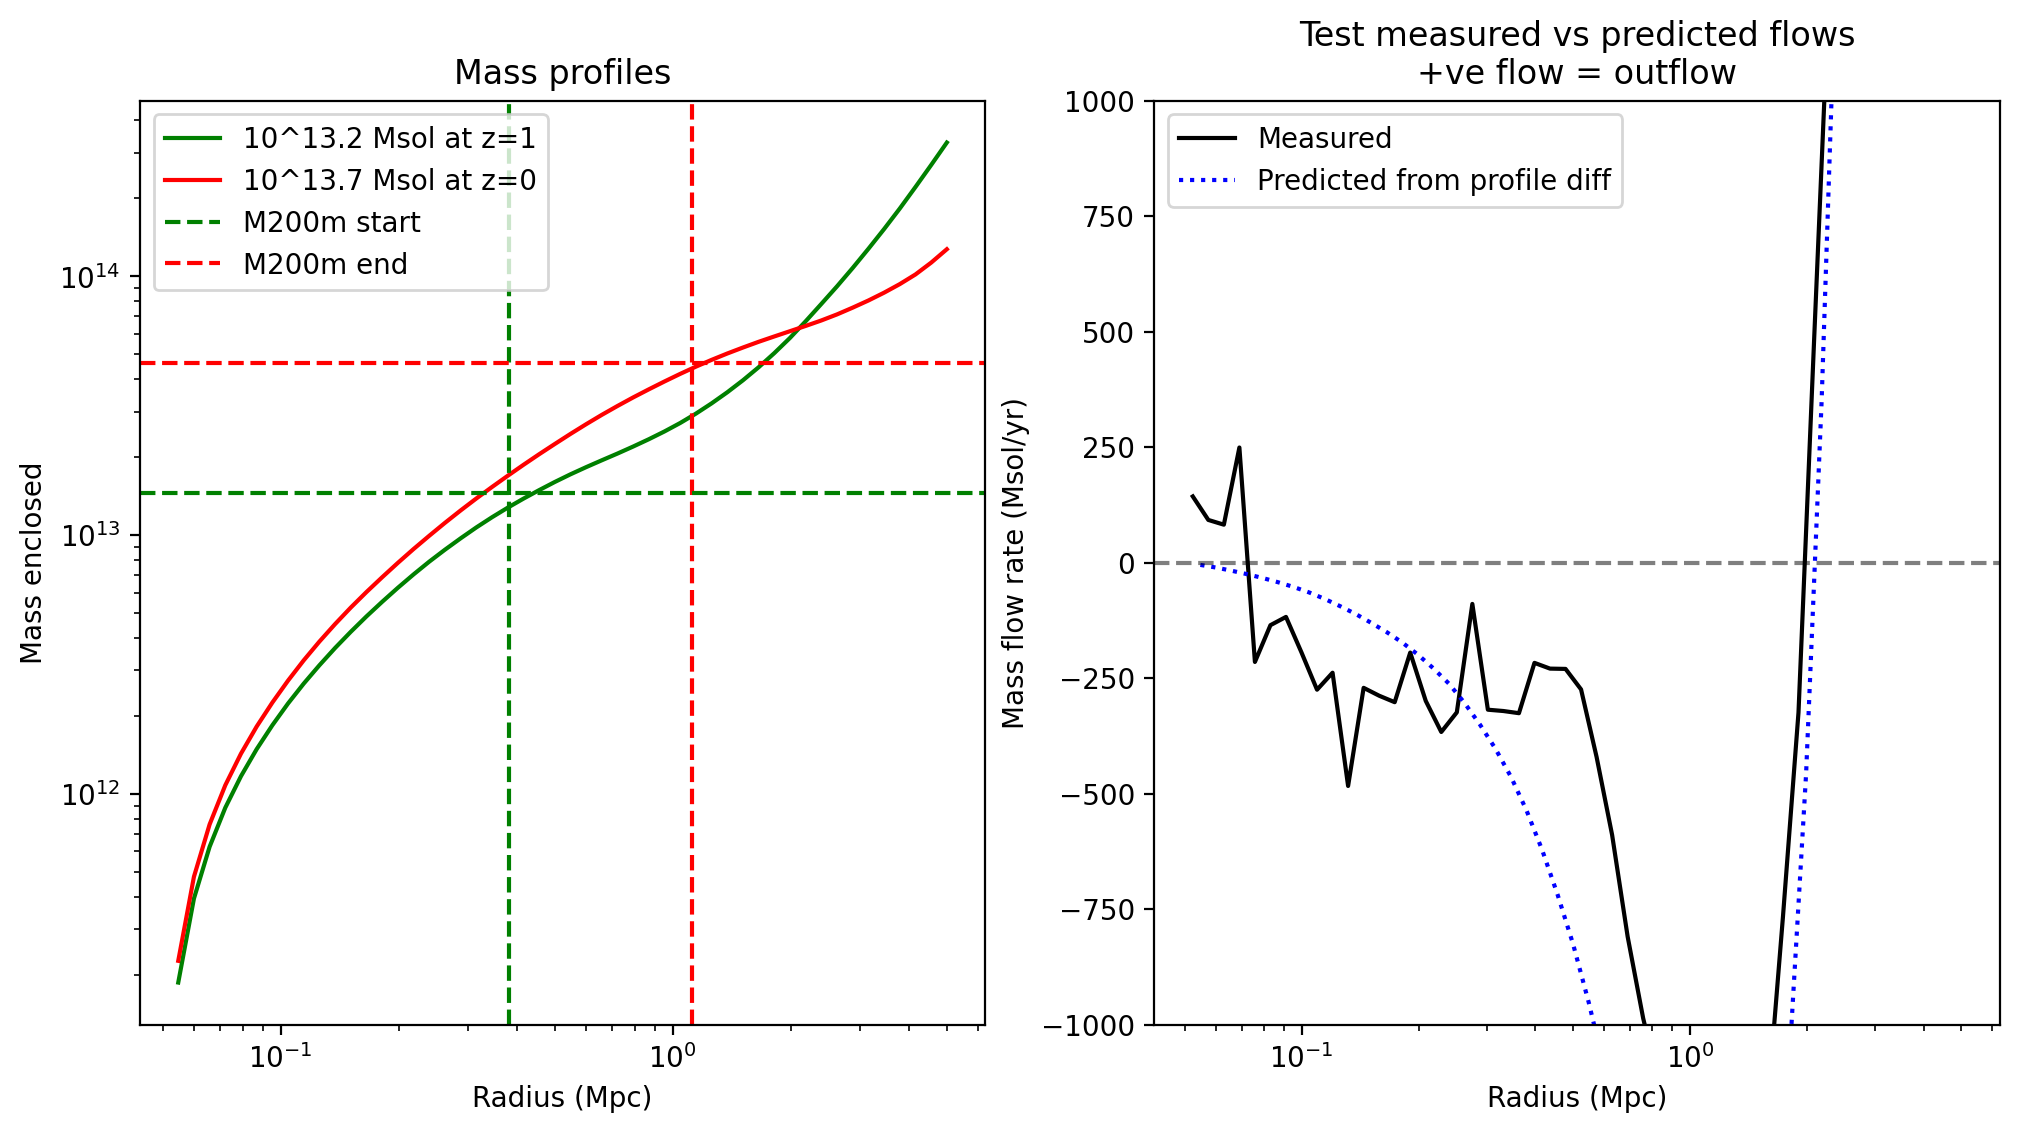

In [3]:
make_sanity_check_plot('total')

<M200m_start>= 13.164144495544397
<M200m_end>= 13.665035546930495
<M200m_mid>= 13.39058330259765


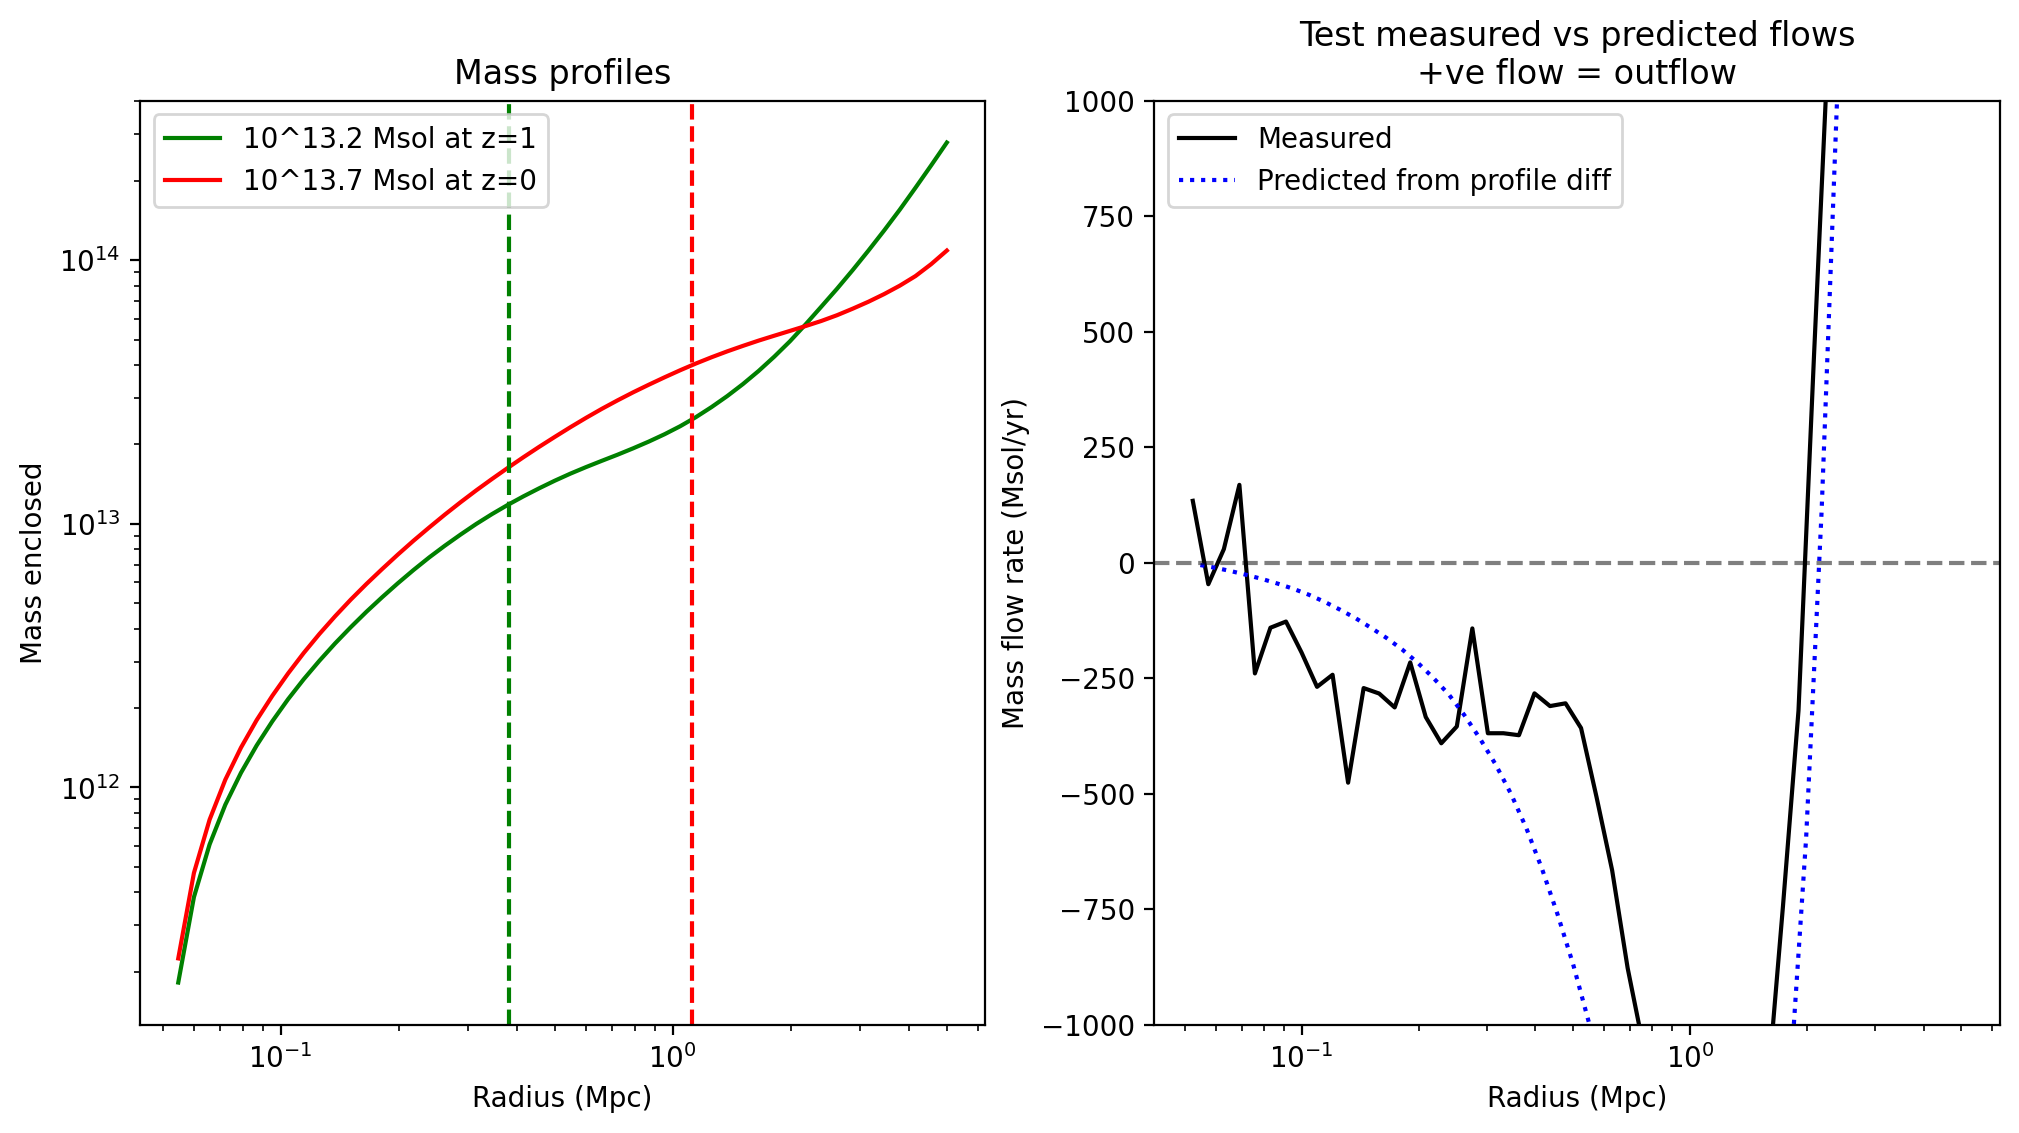

In [4]:
make_sanity_check_plot('dm')

<M200m_start>= 13.164144495544397
<M200m_end>= 13.665035546930495
<M200m_mid>= 13.39058330259765


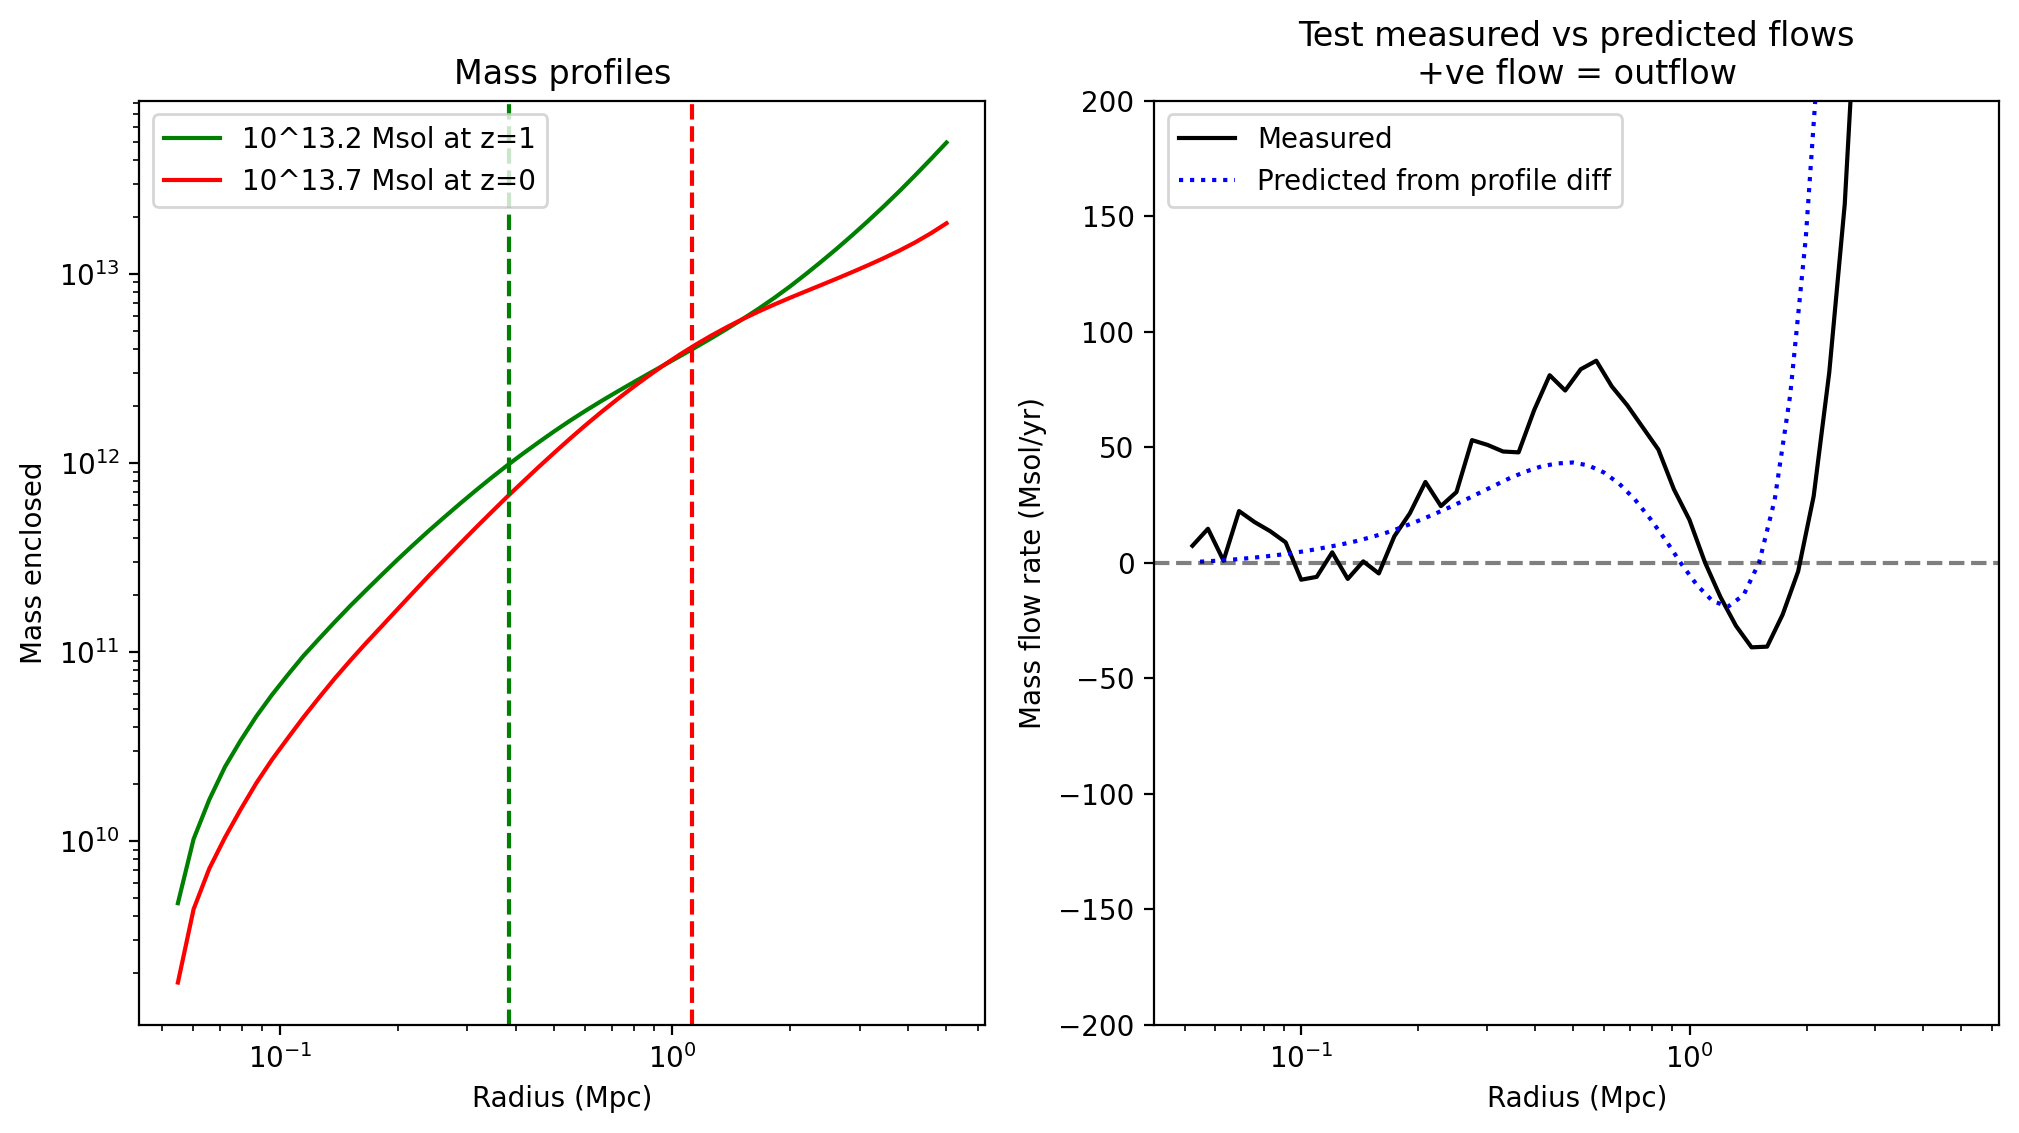

In [5]:
make_sanity_check_plot('gas')

<M200m_start>= 12.686524416507897
<M200m_end>= 13.164913642072062
<M200m_mid>= 12.897947503743062


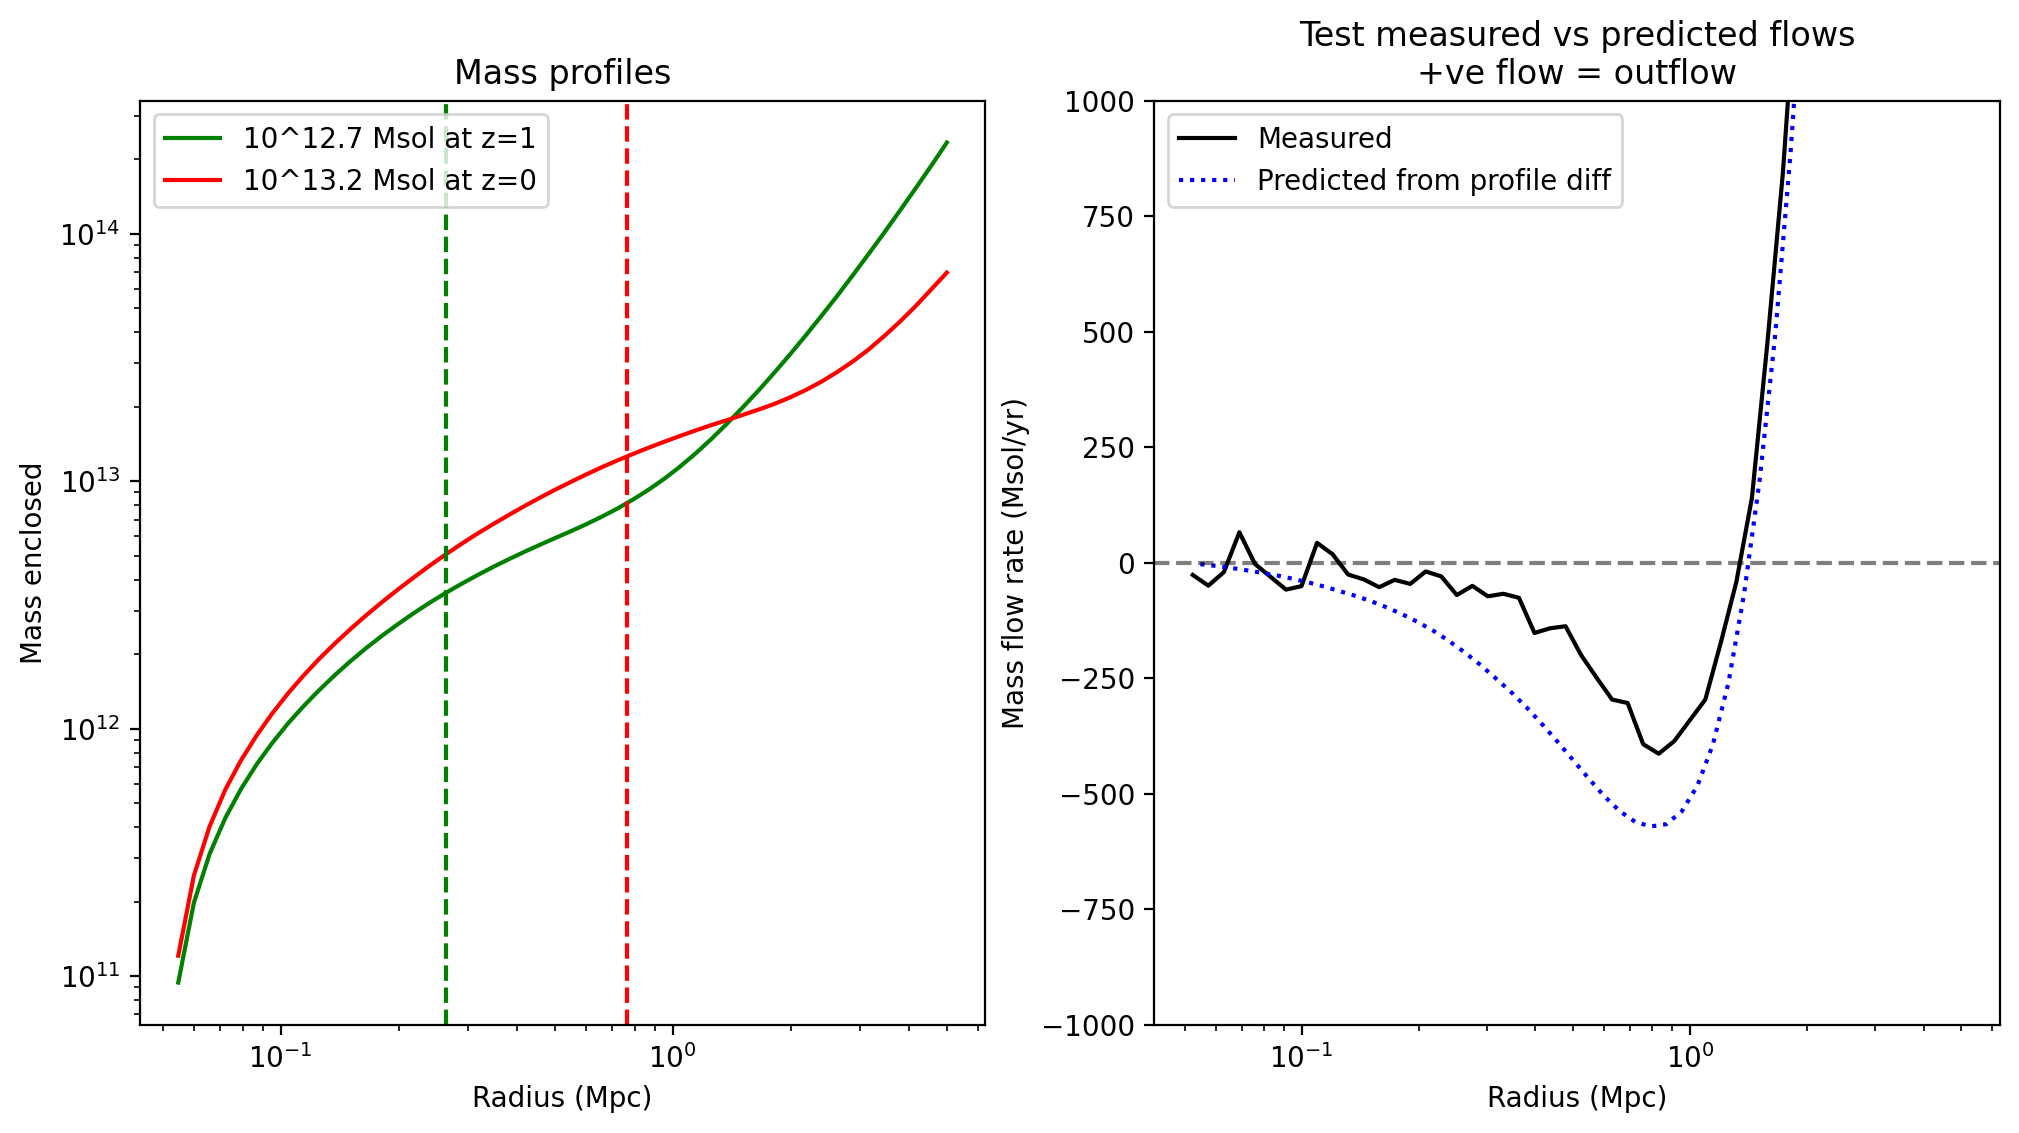

In [69]:
make_sanity_check_plot('dm', m1=12.7, m2=13.2)

<M200m_start>= 12.686524416507897
<M200m_end>= 13.164913642072062
<M200m_mid>= 12.897947503743062


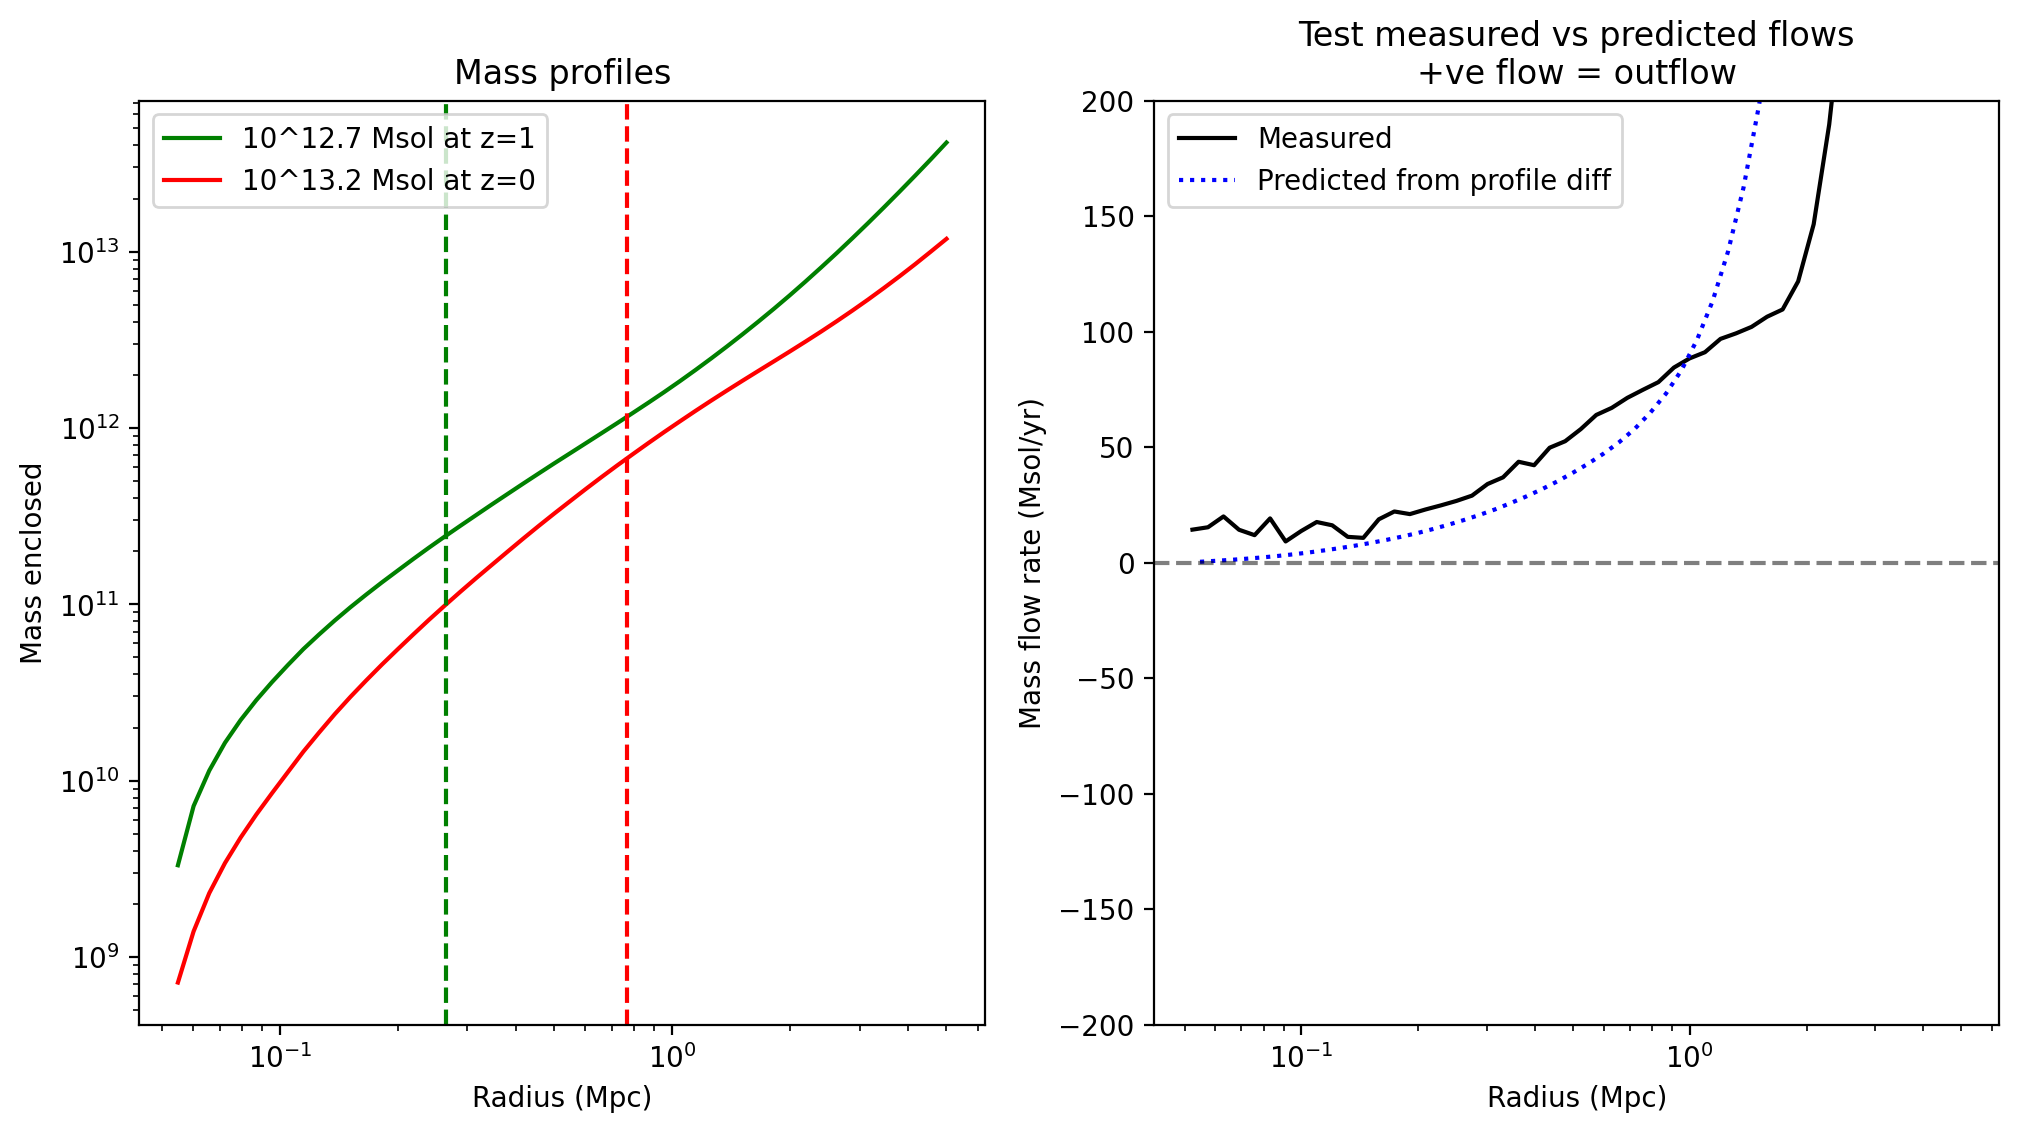

In [70]:
make_sanity_check_plot('gas', m1=12.7, m2=13.2)

<M200m_start>= 13.660337234292504
<M200m_end>= 14.17555388218489
<M200m_mid>= 13.890293740973872


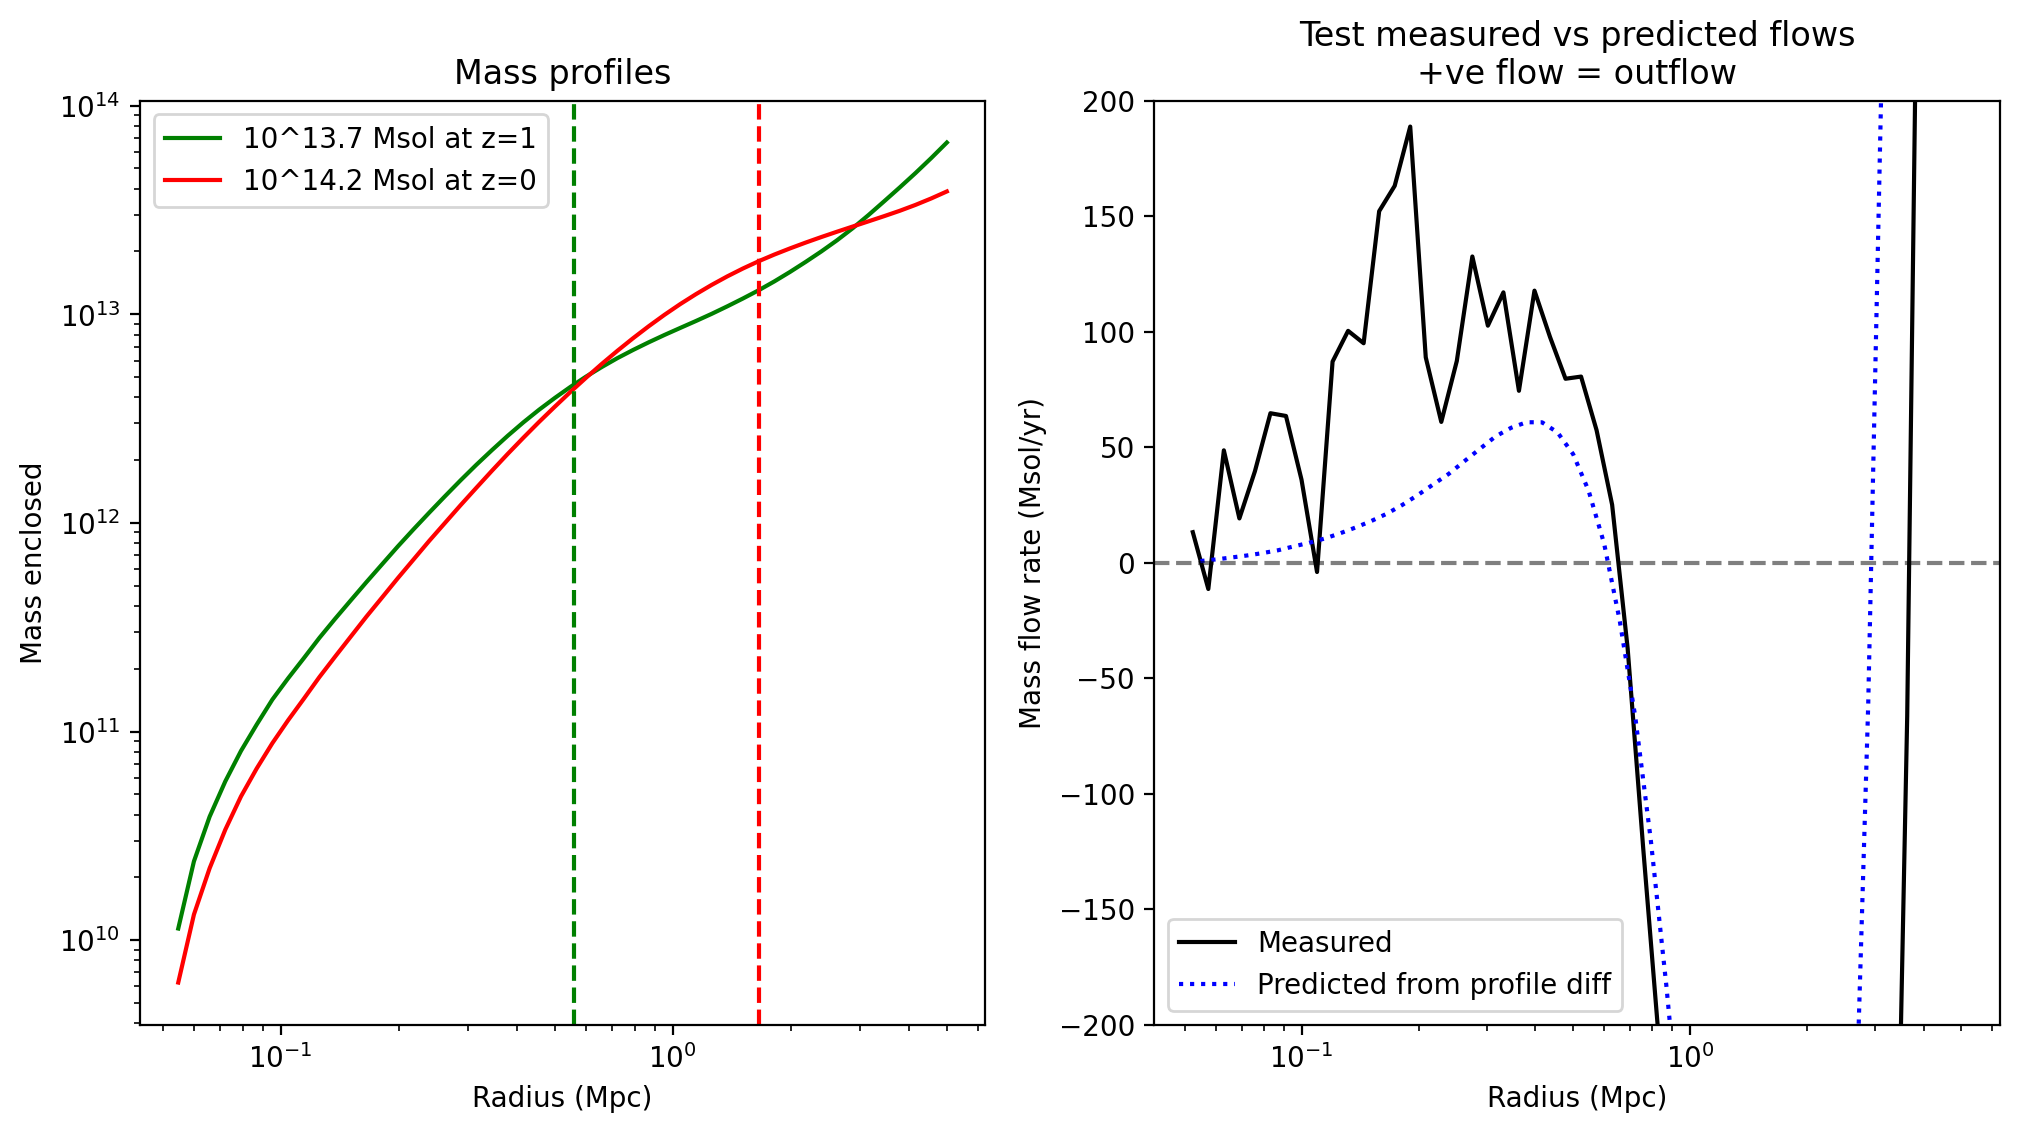

In [71]:
make_sanity_check_plot('gas', m1=13.7, m2=14.2)

A side-issue with tangos halo tracing
-------------------------------------

This comes from asking: is 0.5 dex growth around the right amount between z=1 and 0?

Here's an attempt to check that with tango's built-in merger tree finder. However it's incredibly noisy -- we can select out the things which are only the 'major progenitor' (in blue) and the 0.5 dex upward growth looks about right. But why are there lots of final masses that are lower than the original mass? Like sort of 'anti-progenitors'/'fragments'. Doesn't quite make sense.

Looking at individual cases, it looks like it's mass transfer from a close passage onto a much more massive companion. This somehow gets a high backwards weight.

In [67]:
orig_mass, final_mass, is_mp = ts_end.calculate_all('earlier(7).M200m()','M200m()', 'earlier(7).later(7).dbid() == dbid()')

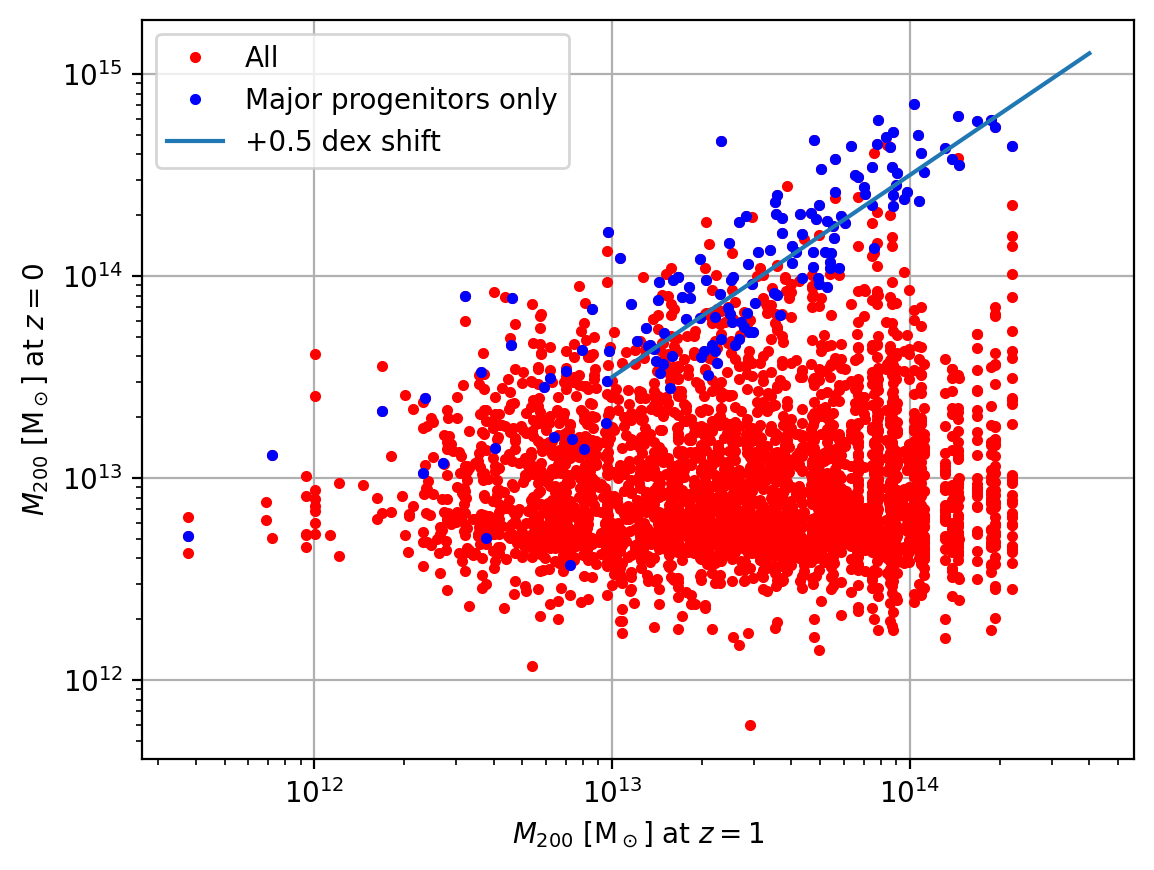

In [68]:
p.loglog(orig_mass, final_mass, 'r.')
p.loglog(orig_mass[is_mp], final_mass[is_mp], 'b.')
p.plot([1e13,4e14],[10**0.5*1e13,10**0.5*4e14])
p.legend(['All', 'Major progenitors only', '+0.5 dex shift'])
p.xlabel(r"$M_{200}$ [M$_\odot$] at $z=1$")
p.ylabel(r"$M_{200}$ [M$_\odot$] at $z=0$")
p.grid()